In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 단순 교차검증
k=5일 때, 데이터를 5개의 부분 집합으로 분할한 후, 
각 분할마다 하나의 폴드를 테스트용으로 사용하고
나머지 4개의 폴드는 훈련용으로 사용한다. 
이 과정을 반복하여 분할마다 정확도를 측정한다. 

### 매개변수
 - 모델명
 - 훈련데이터
 - 타겟데이터
 - cv(폴드 수)

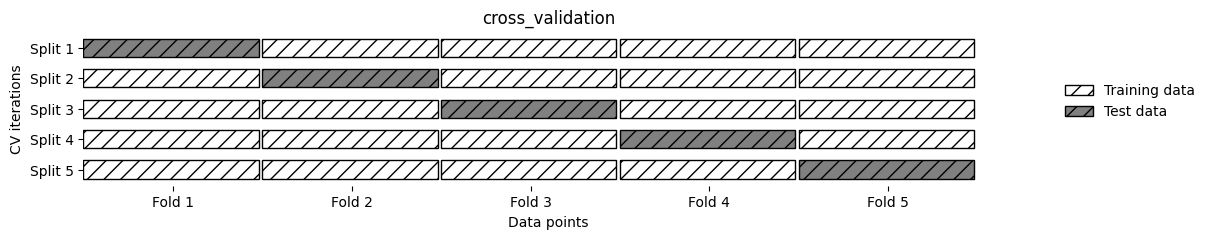

In [2]:
import mglearn
mglearn.plots.plot_cross_validation()

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.linear_model import LogisticRegression   #로지스틱회귀
from sklearn.model_selection import cross_val_score   #교차검증

model = LogisticRegression()

#로지스틱회귀분석 교차검증
scores = cross_val_score(model, iris.data, iris.target, cv=3) # cv=3 default
# cross_val_score(평가자, 피터데이터, 타겟데이터, 교차검증폴드수)

#교차검증 평균
display(scores, scores.mean())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.98, 0.96, 0.98])

0.9733333333333333

## 2. K-Fold 교차검증
 데이터를 무작위로 k개(주로 3, 5, 10)의 동일한 크기인 폴드로 나누고, 각 시행 단계에서 특정 폴드를 테스트용으로, 나머지는 학습용으로 사용한다. 각 폴드를 테스트 세트로 한번씩 사용하고 이 과정을 k번 반복 시행하여 최종적으로 모델 성능의 평균을 계산한다.  
 
 - 장점: 모든 데이터를 학습용으로 사용할 수 있다. 모델의 변동성을 줄여주며, 오버피팅같은 문제를 막는다.
 - 참고: cross_val_score의 함수에는 KFold의 매개변수를 제어할 수가 없으므로, KFold 객체를 만들고 매개변수를 조정한 다음, cross_val_score에 cv 매개변수에 넣어야 한다. 

In [4]:
from sklearn.model_selection import KFold

#KFold 객체 생성
kfold = KFold(3) # shuffle=False

scores1 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=kfold)
scores1

array([0., 0., 0.])

## 3. 계층별 K-Fold 교차검증
 - 데이터가 편향되어 있을 경우, 단순 K-Fold 교차검증 대신 Stratified K-Fold 사용
 - 일반적으로 회귀분석에는 KFold를, 분류분석에는 StratifiedKFold를 사용. 

###  매개변수
  - n_splits : 분할 갯수
  - shuffle : 기본값 False. True를 넣을 경우 Fold전 무작위 섞기.
  - random_state 

In [5]:
from sklearn.model_selection import StratifiedKFold   # 계층별 K-Fold

#StratifiedKFold 객체생성 # shuffle=False
fold = StratifiedKFold(3)

# 교차검증 함수: cross_val_score(모델, 특징행렬, 대상벡터, k값)
# 로지스틱회귀모델을 계층별 K-Fold교차검증
scores2 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=fold)
scores2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.98, 0.96, 0.98])

In [6]:
from sklearn.model_selection import StratifiedKFold

#StratifiedKFold 객체생성 shuffle=True
fold = StratifiedKFold(3, shuffle=True) 

scores2 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=fold)
scores2

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.98, 0.94, 0.98])

## 4. 단일관측치 제거방식 Leave One Out

In [7]:
from sklearn.model_selection import LeaveOneOut

#LeaveOneOut 객체생성
loo = LeaveOneOut()

#로지스틱회귀모델을 loo로 교차검증
scores = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=loo)
display(scores, scores.mean())


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

0.9666666666666667

## 5. GridSearchCV
교차검증과 하이퍼파라미터 튜닝을 동시에 수행한다. 교차 검증 기반으로, 지정된 파라미터들을 순차적으로 적용해보며 최적의 파라미터 값을 찾아준다. 이 때문에 최적의 파라미터를 알 수 있으나 시간이 오래 걸린다. 
    
GridSearchCV 생성자 정리
- estimator : classifier, regressor, pipeline 등 가능
- param_grid : 튜닝을 위해 사용될 파라미터를 dictionary 형태로 입력.
- scoring : 예측 성능을 측정할 평가 방법. 보통 accuracy 로 정확도로 성능 평가.
- cv : 교차 검증에서 몇 개로 분할되는지 지정.
- refit :  default=True, True로 하면 최적의 하이퍼 파라미터를 찾아서 재학습.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

# 분류 서포트 벡터 머신
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearchCV 객체 생성
grid = GridSearchCV(SVC(), params, cv=5)

# 훈련데이터 학습
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [9]:
# 테스트셋 정확도
grid.score(X_test, y_test)

0.9736842105263158

In [10]:
# 최적의 파라미터
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [11]:
#  최고의 정확도
grid.best_score_

0.9818181818181818

In [12]:
#최적의 평가자
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [13]:
# 학습한 결과 .cv_results_[] 함수
result = grid.cv_results_['mean_test_score'].reshape(6,6)
result

array([[0.39090909, 0.39090909, 0.39090909, 0.39090909, 0.37351779,
        0.32134387],
       [0.39090909, 0.39090909, 0.39090909, 0.39090909, 0.37351779,
        0.32134387],
       [0.39090909, 0.39090909, 0.9284585 , 0.9458498 , 0.3826087 ,
        0.32134387],
       [0.39090909, 0.90197628, 0.9458498 , 0.97272727, 0.94624506,
        0.53636364],
       [0.91106719, 0.9458498 , 0.97272727, 0.95454545, 0.95494071,
        0.56324111],
       [0.9458498 , 0.98181818, 0.94624506, 0.95454545, 0.95494071,
        0.56324111]])

([<matplotlib.axis.YTick at 0x2b7a722cf10>,
 [Text(0, 0, '0.001'),
  Text(0, 1, '0.01'),
  Text(0, 2, '0.1'),
  Text(0, 3, '1'),
  Text(0, 4, '10'),
  Text(0, 5, '100')])

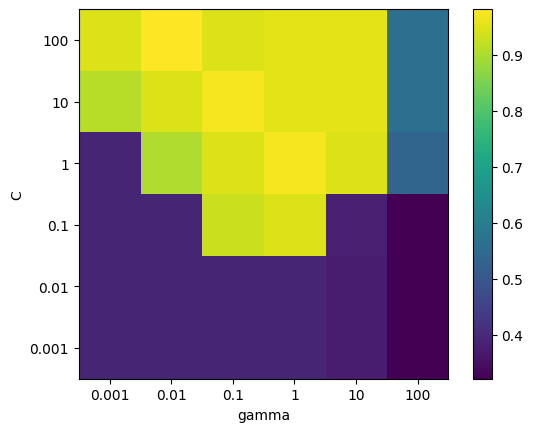

In [14]:
# 이미지맵
# 최적의 파라미터 {'C': 100, 'gamma': 0.01} 에서 최고의 정확도 98% (가장 밝은 노랑)

plt.imshow(result, interpolation='none', origin='lower') 
plt.colorbar()
plt.xlabel('gamma')
plt.ylabel('C')
plt.xticks(range(6), [0.001, 0.01, 0.1, 1, 10, 100])
plt.yticks(range(6), [0.001, 0.01, 0.1, 1, 10, 100])


## 6. 오차 행렬 (Confusion Matrix)
목표값인 y 와, 예측 결과인 pred_y 값을 비교하여 결과를 평가하는 방법
 
True Positive     False Positive  
False Negative    True Negative  

In [15]:
from sklearn.datasets import load_breast_cancer

# 유방암데이터 객체 생성
cancer = load_breast_cancer()

# 훈련셋, 테스트셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

# 로지스틱회귀모델 객체 생성
model = LogisticRegression()

# 훈련셋 학습
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
cancer.data.shape

(569, 30)

In [17]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [18]:
# X_test에 대한 y예측값 
pred_y = model.predict(X_test)

# 실제 y 테스트값과 테스트셋 X에 대한 예측값
display(y_test, pred_y)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [19]:
np.bincount(y_test)

array([50, 93], dtype=int64)

In [20]:
np.bincount(pred_y) 

array([44, 99], dtype=int64)

In [21]:
#실제값과 예측값이 다른 위치
np.where((pred_y==1) & (y_test==0))

(array([ 11,  26,  42,  55,  69,  94, 107, 129], dtype=int64),)

In [22]:
# ??? 
5 / 90 # 괜찮다고 진단 했는데 실제로는 심한 사람

0.05555555555555555

In [23]:
# ??? 
5 / 53 # 실제 심한 사람인데 괜찮다고 진단한 경우

0.09433962264150944

In [24]:
y_test[np.where(pred_y==1)[0]]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
score = (y_test == pred_y).sum() / len(y_test)
score

0.9300699300699301

In [26]:
(y_test == pred_y).sum()

133

In [27]:
len(y_test)

143

In [28]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, pred_y)
cmat

# 오차행렬 Confusion Matrix
# True Positive   False Positive
# False Negative  True Negative

array([[42,  8],
       [ 2, 91]], dtype=int64)

In [29]:
(y_test==0).sum()

50

In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
model = LogisticRegression()
model.fit(X_train, y_train)
pred_y = model.predict(X_test)
cmat = confusion_matrix(y_test, pred_y)
cmat #??? 

array([[16,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]], dtype=int64)

In [31]:
from sklearn.datasets import load_digits
mnist = load_digits()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target)
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.96

In [33]:
pred_y = model.predict(X_test)
result = np.zeros([10,10])
for i in range(len(y_test)):
    result[y_test[i],pred_y[i]] +=1
    result
#???

In [34]:
cmat = confusion_matrix(y_test, pred_y)
cmat

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  1,  1,  0,  0,  0,  1,  0],
       [ 0,  2, 51,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 45,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  1,  0, 50,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

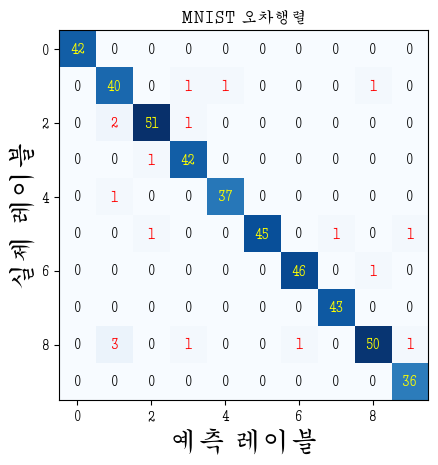

In [35]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/uni_hsr.ttf").get_name()
rc('font', family=font_name)
plt.imshow(cmat, cmap='Blues')
plt.title('MNIST 오차행렬')

plt.xlabel('예측 레이블', fontsize=20)
plt.ylabel('실제 레이블', fontsize=20)

for (i,j),v in np.ndenumerate(cmat):
    if v==0: 
        plt.text(j,i,v,ha='center',va='center')
    elif v<30: 
        plt.text(j,i,v,ha='center',va='center', color='red')
    else: 
        plt.text(j,i,v,ha='center',va='center',color='yellow')